In [1]:
!pip install tensorflow

In [22]:
import sys
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [18]:
data_paths = []
for directory, subdirectories, files in os.walk("../../../Data/"):

    phn_dir = ""
    wav_dir = ""
    prompts_dir = ""

    for subdirectory in subdirectories:

        if subdirectory.startswith("phn_"):
            phn_dir = os.path.join(directory, subdirectory)

        elif phn_dir and subdirectory.startswith("wav_"):
            if (phn_dir.endswith("headMic") and subdirectory.endswith("headMic")) or (phn_dir.endswith("arrayMic") and subdirectory.endswith("arrayMic")):
                wav_dir = os.path.join(directory, subdirectory)

        elif subdirectory.startswith("prompts"):
            prompts_dir = os.path.join(directory, subdirectory)

    if phn_dir and wav_dir and prompts_dir:
        data_paths.append((phn_dir, wav_dir, prompts_dir))


In [29]:


for paths in data_paths:
    valid_inputs = []
    for filename in os.listdir(paths[2]):
        with open(os.path.join(paths[2], filename)) as f:
            prompt = f.readline().rstrip().lower()
            if prompt in ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'yes', 'no', 'up', 'down', 'left', 'right', 'go', 'on', 'off', 'stop']:
                valid_inputs.append((os.path.splitext(os.path.basename(filename))[0], prompt))

    valid_timestamps = []
    for valid_input in valid_inputs:
        wav_start = 10000000000
        wav_end = 0
        phn_fullpath = os.path.join(paths[0], valid_input[0] + ".phn")
        if not os.path.exists(phn_fullpath):
            print("Matching phoneme file not found for {}".format(valid_input))
            continue
        lines = []
        with open(phn_fullpath) as f:
            lines = f.read().splitlines()
            """
            for line in f:
                tokens = line.rstrip().split(" ")
                if tokens[-1].lower() != "sil":
                    wav_start = min(wav_start, tokens[0])
                    wav_end = max(wav_end, tokens[1])
            """
        if len(lines) < 2:
            continue

        wav_start = int(lines[1].rstrip().split(" ")[0])
        wav_end = int(lines[-1].rstrip().split(" ")[1])
        valid_timestamps.append((*valid_input, wav_start, wav_end))
    
    audio_labels = []
    for valid_timestamp in valid_timestamps:
        wav_fullpath = os.path.join(paths[1], valid_timestamp[0] + ".wav")
        if not os.path.exists(wav_fullpath):
            print("Matching WAV file not found for {}".format(valid_input))
            continue
        wav_binary = tf.io.read_file(wav_fullpath)
        audio, _ = tf.audio.decode_wav(wav_binary)
        audio = audio[valid_timestamp[2]:valid_timestamp[3]]
        audio_labels.append((audio, valid_timestamp[1]))

Matching phoneme file not found for ('0082', 'yes')
Matching phoneme file not found for ('0144', 'eight')
Matching phoneme file not found for ('0156', 'yes')
Matching phoneme file not found for ('0172', 'nine')
Matching phoneme file not found for ('0184', 'zero')
Matching phoneme file not found for ('0185', 'seven')
Matching phoneme file not found for ('0199', 'six')
Matching phoneme file not found for ('0220', 'no')
Matching phoneme file not found for ('0038', 'one')
Matching phoneme file not found for ('0039', 'up')
Matching phoneme file not found for ('0049', 'right')
Matching phoneme file not found for ('0058', 'go')
Matching phoneme file not found for ('0074', 'left')
Matching phoneme file not found for ('0080', 'down')
Matching phoneme file not found for ('0107', 'two')
Matching phoneme file not found for ('0118', 'yes')
Matching phoneme file not found for ('0124', 'no')
Matching phoneme file not found for ('0108', 'yes')


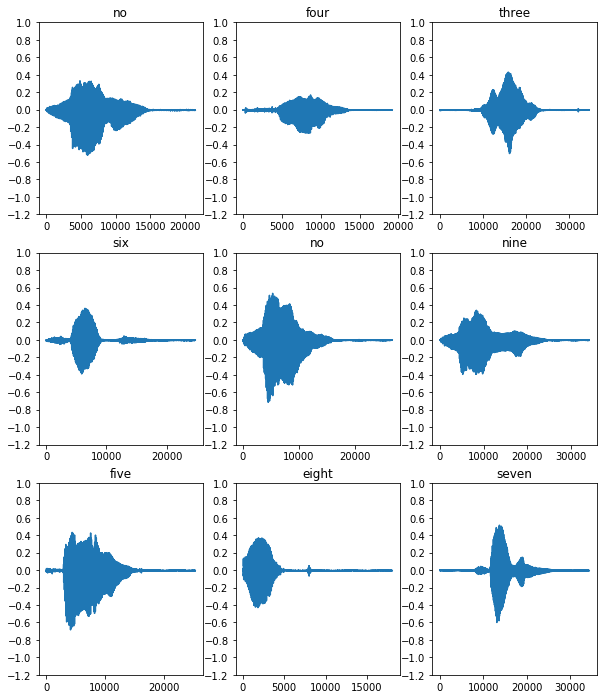

In [33]:
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))
for i, (audio, label) in enumerate(audio_labels[0:n]):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  ax.plot(audio)
  ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
  ax.set_title(label)

plt.show()